In [99]:
import pandas as pd
from collections import Counter
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

%matplotlib inline

In [130]:
print(wordcloud.__version__)

AttributeError: 'WordCloud' object has no attribute '__version__'

## Test with frequencies

For later:

1. Take top words per topic and their respective probabilities
2. Multiply words with probabilities and constant factor 100 to represent frequency
3. Generate list of words for each topic based on frequency
4. Transform list to set and update Counter
5. Generate word cloud

In [2]:
df = pd.read_csv("../output/topics/all_topics.csv", sep=";", decimal=",")

In [3]:
topic_no = 0
word_no = 100

In [4]:
# Get data for specific topic
df_topic = df[df["topic"]==topic_no]

In [5]:
# Specify columns to be kept
columns = ["word", "load"]
df_topics_overall = df_topic[columns]

In [17]:
# Group values by words over all time periods
df_grouped = df_topics_overall.groupby("word", as_index=False).sum()

In [21]:
# Sort descending and grab top n words
df_sorted = df_grouped.sort_values("load", ascending=False)
df_top_n = df_sorted[:word_no]

In [23]:
# Tranform loads into artificial frequencies and reset index
def generate_frequency(load):
    return round(load*1000)

In [24]:
freq_values = df_top_n["load"].apply(lambda load: generate_frequency(load))    
df_top_n["freq"] = freq_values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# Generate list with words considering the artificial frequency
freq_list = df_top_n["freq"].values
word_list = df_top_n["word"].values
topic_word_list = []

In [32]:
for i in range(len(word_list)):
    word = word_list[i]
    freq = freq_list[i]

    word_freq = [word]*int(freq)
    topic_word_list = topic_word_list + word_freq

In [33]:
# Initialize and update counter
result = Counter()
result.update(topic_word_list)

In [112]:
# Generate word cloud
cm = ListedColormap([0, 0, 0, 1]) # black

wc = WordCloud(background_color="white", colormap=cm, max_font_size=80, random_state=0, max_words=50, width=200, height=200)
wordcloud = wc.fit_words(result)

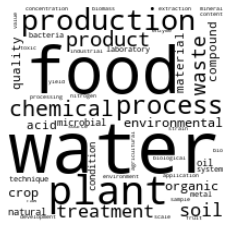

In [113]:
# Plot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

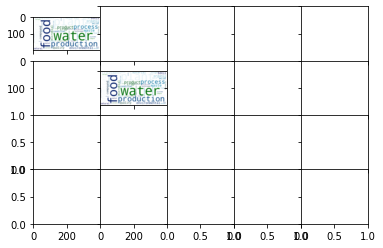

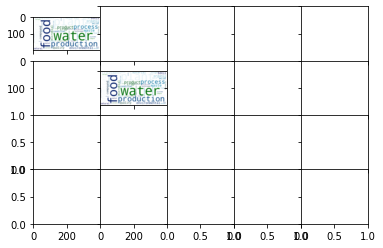

In [68]:
fig, axs = plt.subplots(4,5, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
axs[0][0].imshow(wordcloud, interpolation="bilinear")
axs[1][1].imshow(wordcloud, interpolation="bilinear")

[]

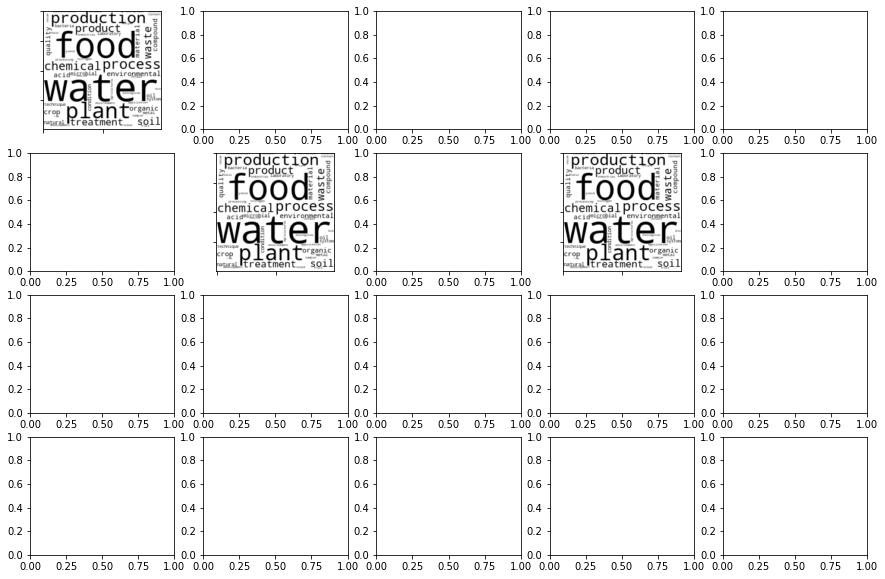

In [123]:
fig, axs = plt.subplots(4,5, figsize=[15, 10])
axs[0][0].imshow(wordcloud, interpolation="bilinear")
axs[0][0].set_yticklabels([])
axs[0][0].set_xticklabels([])
axs[1][1].imshow(wordcloud, interpolation="bilinear")
axs[1][1].set_yticklabels([])
axs[1][1].set_xticklabels([])
axs[1][3].imshow(wordcloud, interpolation="bilinear")
axs[1][3].set_yticklabels([])
axs[1][3].set_xticklabels([])

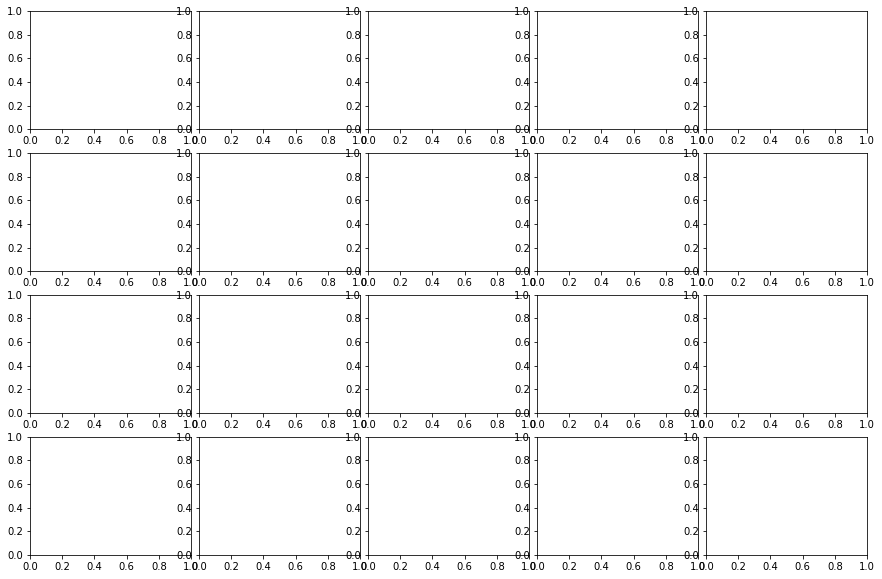

In [132]:
fig, axs = plt.subplots(4,5, figsize=[15, 10])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.2)

In [122]:
for row, col in zip(range(4), range(5)):
    print(col)

0
1
2
3


In [124]:
import itertools

In [128]:
for i, j in itertools.product(range(4), range(5)):
    print(i,j, 5*i+j)

0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14
3 0 15
3 1 16
3 2 17
3 3 18
3 4 19


In [25]:
def generate_word_cloud(topic_no, word_no):

    # Get data for specific topic
    df_topic = df[df["topic"]==topic_no]

    # Specify columns to be kept
    columns = ["word", "load"]
    df_topics_overall = df_topic[columns]

    # Group values by words over all time periods
    df_grouped = df_topics_overall.groupby(["word"]).sum()

    # Sort descending and grab top n words
    df_sorted = df_grouped.sort_values("load", ascending=False)
    df_top_n = df_sorted[:word_no]

    # Tranform loads into artificial frequencies and reset index
    def generate_frequency(load):
        return round(load*1000)

    freq_values = df_top_n["load"].apply(lambda load: generate_frequency(load))    
    df_top_n["freq"] = freq_values

    # Convert word column from index to normal column
    df_top_n = df_top_n.reset_index()

    # Generate list with words considering the artificial frequency
    freq_list = df_top_n["freq"]
    word_list = df_top_n["word"]
    topic_word_list = []

    for i in range(len(word_list)):
        word = word_list[i]
        freq = freq_list[i]

        word_freq = [word]*int(freq)
        topic_word_list = topic_word_list + word_freq

    # Initialize and update counter
    result = Counter()
    result.update(topic_word_list)

    # Generate word cloud
    wc = WordCloud(background_color="white", colormap="ocean", max_font_size=80, random_state=0, max_words=50, width=400, height=200)
    wordcloud = wc.fit_words(result)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


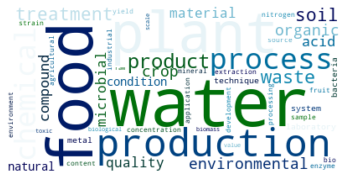

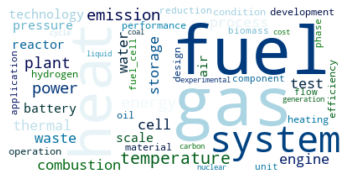

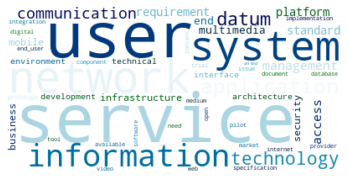

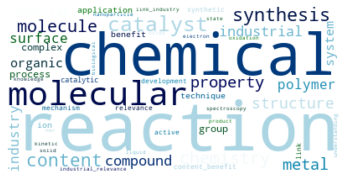

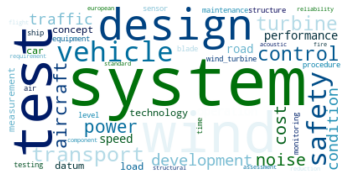

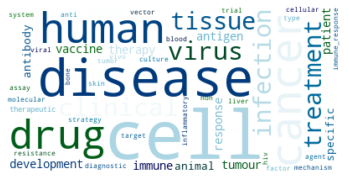

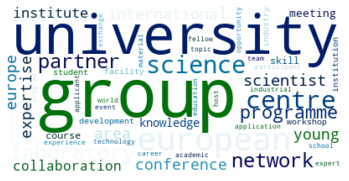

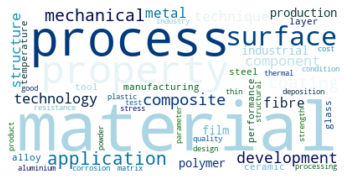

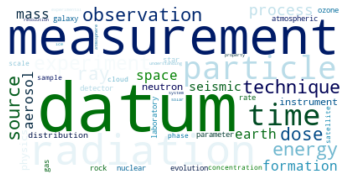

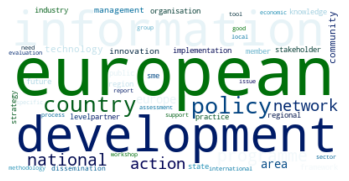

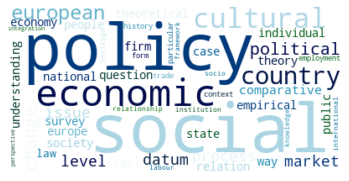

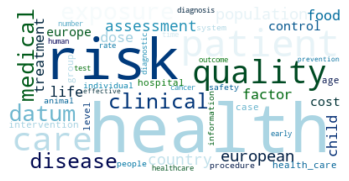

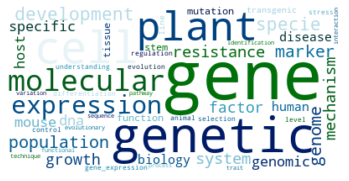

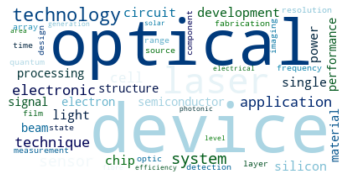

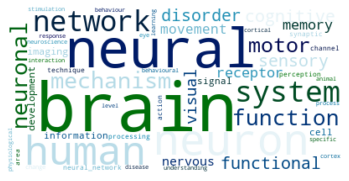

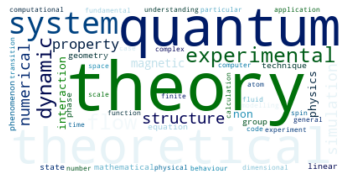

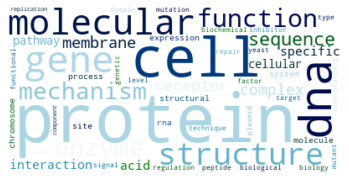

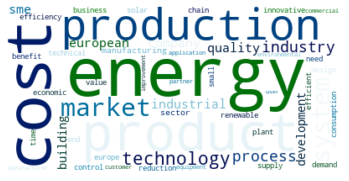

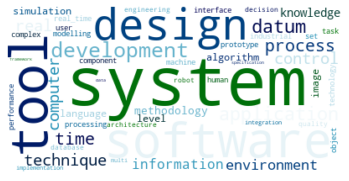

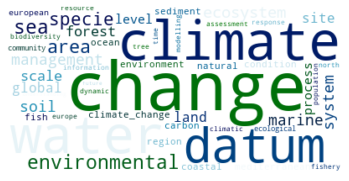

In [26]:
for i in range(20):
    generate_word_cloud(i, word_no)